In [364]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.sparse.linalg as sps_linalg

In [365]:
example1 = './data/example1.dat'
test = './data/test.dat'

with open(example1) as file:
  lines = [line.rstrip().split(',') for line in file]

lines = np.array(lines, dtype=int) - 1
lines

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ...,
       [215, 234],
       [212, 234],
       [240, 234]])

In [366]:
# col1 = lines[:,0]
# col2 = lines[:,1]
maxID = lines.max()
maxID

A = np.zeros(shape=(maxID + 1, maxID + 1))

for edge in lines:
  fromNode = edge[0]
  toNode = edge[1]

  A[fromNode][toNode] = 1
  # A[toNode][fromNode] = 1

A

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Graph Laplacian

In [367]:
D = np.diag(A.sum(axis=1))
L = D-A
L

array([[ 7., -1., -1., ...,  0.,  0.,  0.],
       [-1.,  8.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.]])

## Transition Matrix?

In [368]:
T = np.zeros(shape=A.shape)

for i in range(len(A)):
  T[i] = A[i] / np.sum(A[i])

T

array([[0.        , 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Covariance Matrix?

In [369]:
ACovMat = np.cov(A.T)
ACovMat

array([[ 2.83195021e-02, -9.68188105e-04, -1.08921162e-03, ...,
        -2.42047026e-04, -6.05117566e-04, -2.42047026e-04],
       [-9.68188105e-04,  3.22268326e-02,  1.54218534e-02, ...,
        -2.76625173e-04, -6.91562932e-04, -2.76625173e-04],
       [-1.08921162e-03,  1.54218534e-02,  3.60995851e-02, ...,
        -3.11203320e-04, -7.78008299e-04, -3.11203320e-04],
       ...,
       [-2.42047026e-04, -2.76625173e-04, -3.11203320e-04, ...,
         8.26417704e-03, -1.72890733e-04, -6.91562932e-05],
       [-6.05117566e-04, -6.91562932e-04, -7.78008299e-04, ...,
        -1.72890733e-04,  2.04011065e-02,  3.99377593e-03],
       [-2.42047026e-04, -2.76625173e-04, -3.11203320e-04, ...,
        -6.91562932e-05,  3.99377593e-03,  8.26417704e-03]])

## Eigenvalues

In [370]:
# eigenvalues and eigenvectors
eigenVals, eigenVecs = np.linalg.eig(L)

# sort these based on the eigenvalues
eigenVecs = eigenVecs[:,np.argsort(eigenVals)]
eigenVals = eigenVals[np.argsort(eigenVals)]

In [371]:
print(eigenVals)
print(eigenVecs)

[-1.13845379e-14 -1.13734050e-15  0.00000000e+00  6.72896273e-16
  4.26173719e-01  8.07341776e-01  1.11104607e+00  1.34777269e+00
  1.42400923e+00  1.49149550e+00  1.53452230e+00  1.54298987e+00
  1.57501491e+00  1.57730133e+00  1.62534276e+00  1.67127565e+00
  1.73607807e+00  1.75254112e+00  1.77737310e+00  1.85224595e+00
  2.01500333e+00  2.03647388e+00  2.17153387e+00  2.17192167e+00
  2.37454464e+00  2.37524254e+00  2.38002269e+00  2.38947987e+00
  2.46271582e+00  2.51228018e+00  2.55783206e+00  2.61176844e+00
  2.61253474e+00  2.64421075e+00  2.67751455e+00  2.86363193e+00
  2.88172143e+00  2.89820606e+00  2.92030468e+00  3.00000000e+00
  3.06876544e+00  3.14123718e+00  3.21968665e+00  3.29926717e+00
  3.36860397e+00  3.44115523e+00  3.46443123e+00  3.51684829e+00
  3.57241768e+00  3.59479689e+00  3.62854319e+00  3.64870651e+00
  3.70468907e+00  3.75333722e+00  3.78428899e+00  3.88387617e+00
  3.99192324e+00  3.99752197e+00  4.00000000e+00  4.01009897e+00
  4.02163457e+00  4.15976

3


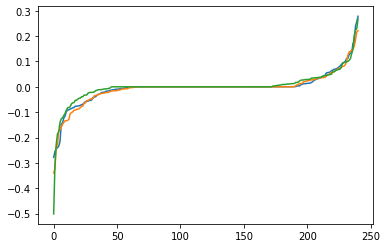

In [379]:
fiedlerIndex = 0

for i in range(len(eigenVals)):
  if eigenVals[i] > 0:
    fiedlerIndex = i
    break

print(fiedlerIndex)

import matplotlib.pyplot as plt

fiedlerVector = eigenVecs[1]

xpoints = range(0, maxID + 1)
ypoints = np.sort(fiedlerVector)

plt.plot(xpoints, ypoints)
plt.show()


## Random Article

https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

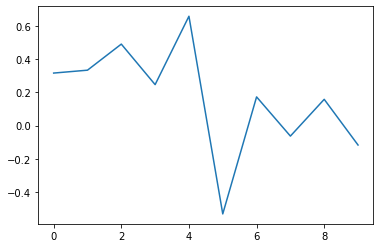

In [363]:
# Adjacency Matrix:
A =  np.array([[0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
              [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
              [1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# diagonal matrix
D = np.diag(A.sum(axis=1))

# graph laplacian
L = D-A

# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

import matplotlib.pyplot as plt

xpoints = range(0, 10)
ypoints = (vecs[1])

plt.plot(xpoints, ypoints)
plt.show()